# Machine Learning Final Project 

## 1 - Problem Definition:

⦁ The goal is to predict rental prices Based on selected features.

## 2 - Preparing Environment

- Importing dependencies

In [437]:
# Start with pandas and NumPy
import pandas as pd
import numpy as np

# Seaborn and Matplotlib for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression  

# KMeans
from sklearn.cluster import KMeans

#Label Encoder 
from sklearn.preprocessing import LabelEncoder

# Scaler 
from sklearn.preprocessing import StandardScaler

# Data splitting
from sklearn.model_selection import train_test_split


# Metrics
from sklearn import metrics

## 3 - Data Preparation

### Data Importation

In [438]:
df = pd.read_csv('Data/NY-House-Dataset.csv')
df.head(3)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.0,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.0,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.0,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109


### Data Cleaning

- Outliers

In [439]:
# Removing outliers

# Calculate Z-score for PRICE
z_score = (df['PRICE'] - df['PRICE'].mean()) / df['PRICE'].std()

# Identify the outliers 
bad_outliers = df[z_score.abs() > 2]

# Remove the outliers from the original dataframe
df = df.loc[z_score.abs() <= 2]

In [440]:
df.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.799000e+03,4799.000000,4799.000000,4799.000000,4799.000000,4799.000000
mean,1.869803e+06,3.355282,2.371516,2179.378401,40.714257,-73.941534
std,4.065642e+06,2.601794,1.943546,2364.576440,0.087645,0.101019
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639467,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949176
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771925,-73.870638
max,6.500000e+07,50.000000,50.000000,65535.000000,40.912729,-73.702450


- Null Values

In [441]:
# Check if there exists null values 
print(df.isnull().sum().sum())

0


- Duplicates

In [442]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 214


In [443]:
# Drop duplicates and update the DataFrame
df = df.drop_duplicates()

# Verify duplicates are removed
print("Number of duplicate rows after removal:", df.duplicated().sum())

Number of duplicate rows after removal: 0


#### Handling nominal feattures:

In [444]:
# Handling the type :
type_counts = df['TYPE'].value_counts()
type_counts

TYPE
Co-op for sale                1388
House for sale                 965
Condo for sale                 841
Multi-family home for sale     699
Townhouse for sale             288
Pending                        229
Contingent                      87
Land for sale                   47
For sale                        20
Foreclosure                     14
Condop for sale                  4
Coming Soon                      2
Mobile house for sale            1
Name: count, dtype: int64

In [445]:
df['TYPE'] = df['TYPE'].replace({
    'Mobile house for sale': 'House for sale', 
    'Coming Soon': 'Pending'
})


In [446]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'TYPE' column
df['TYPE'] = label_encoder.fit_transform(df['TYPE'])

# Display the corresponding encoded values and original classes
for i, type_class in enumerate(label_encoder.classes_):
    print(f"Encoded number {i} corresponds to: {type_class}")

Encoded number 0 corresponds to: Co-op for sale
Encoded number 1 corresponds to: Condo for sale
Encoded number 2 corresponds to: Condop for sale
Encoded number 3 corresponds to: Contingent
Encoded number 4 corresponds to: For sale
Encoded number 5 corresponds to: Foreclosure
Encoded number 6 corresponds to: House for sale
Encoded number 7 corresponds to: Land for sale
Encoded number 8 corresponds to: Multi-family home for sale
Encoded number 9 corresponds to: Pending
Encoded number 10 corresponds to: Townhouse for sale


#### Getting rid of irrelevant columns 

In [447]:
# Drop irrelevant columns
df = df.drop(columns=[
    'BROKERTITLE', 'ADDRESS', 'STATE', 'MAIN_ADDRESS', 
    'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY', 'SUBLOCALITY', 
    'STREET_NAME', 'LONG_NAME', 'FORMATTED_ADDRESS'
])

In [448]:
df.head()

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
0,1,315000,2,2.000000,1400.0,40.761255,-73.974483
2,6,260000,4,2.000000,2015.0,40.541805,-74.196109
3,1,69000,3,1.000000,445.0,40.761398,-73.974613
4,10,55000000,7,2.373861,14175.0,40.767224,-73.969856
5,6,690000,5,2.000000,4004.0,40.674363,-73.958725


## 4 - Data Analysis and Visualization

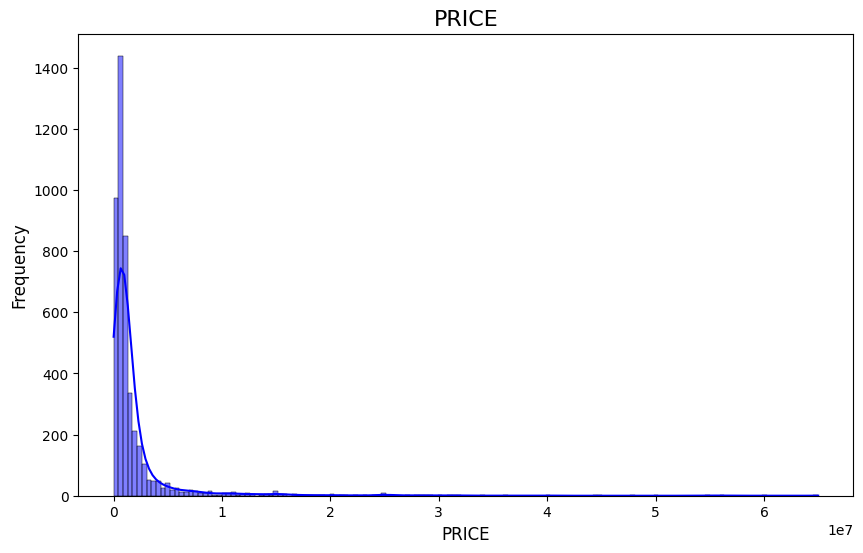

In [449]:
# Distribution of PRICE
plt.figure(figsize=(10, 6))  
sns.histplot(df['PRICE'], bins=150, kde=True, color='blue')
plt.title('PRICE', fontsize=16)
plt.xlabel('PRICE', fontsize=12)
plt.ylabel('Frequency', fontsize=12)  
plt.show()


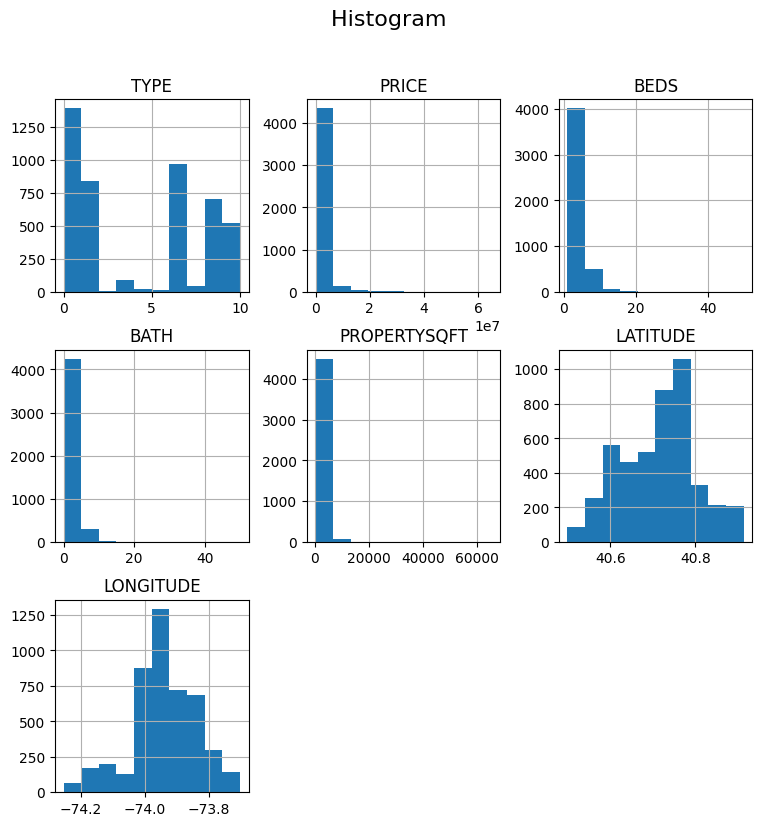

In [450]:
# Histogram :
fig = df.hist()
fig=plt.gcf()
fig.suptitle("Histogram ", fontsize=16)
fig.set_size_inches(9,9)
plt.show()

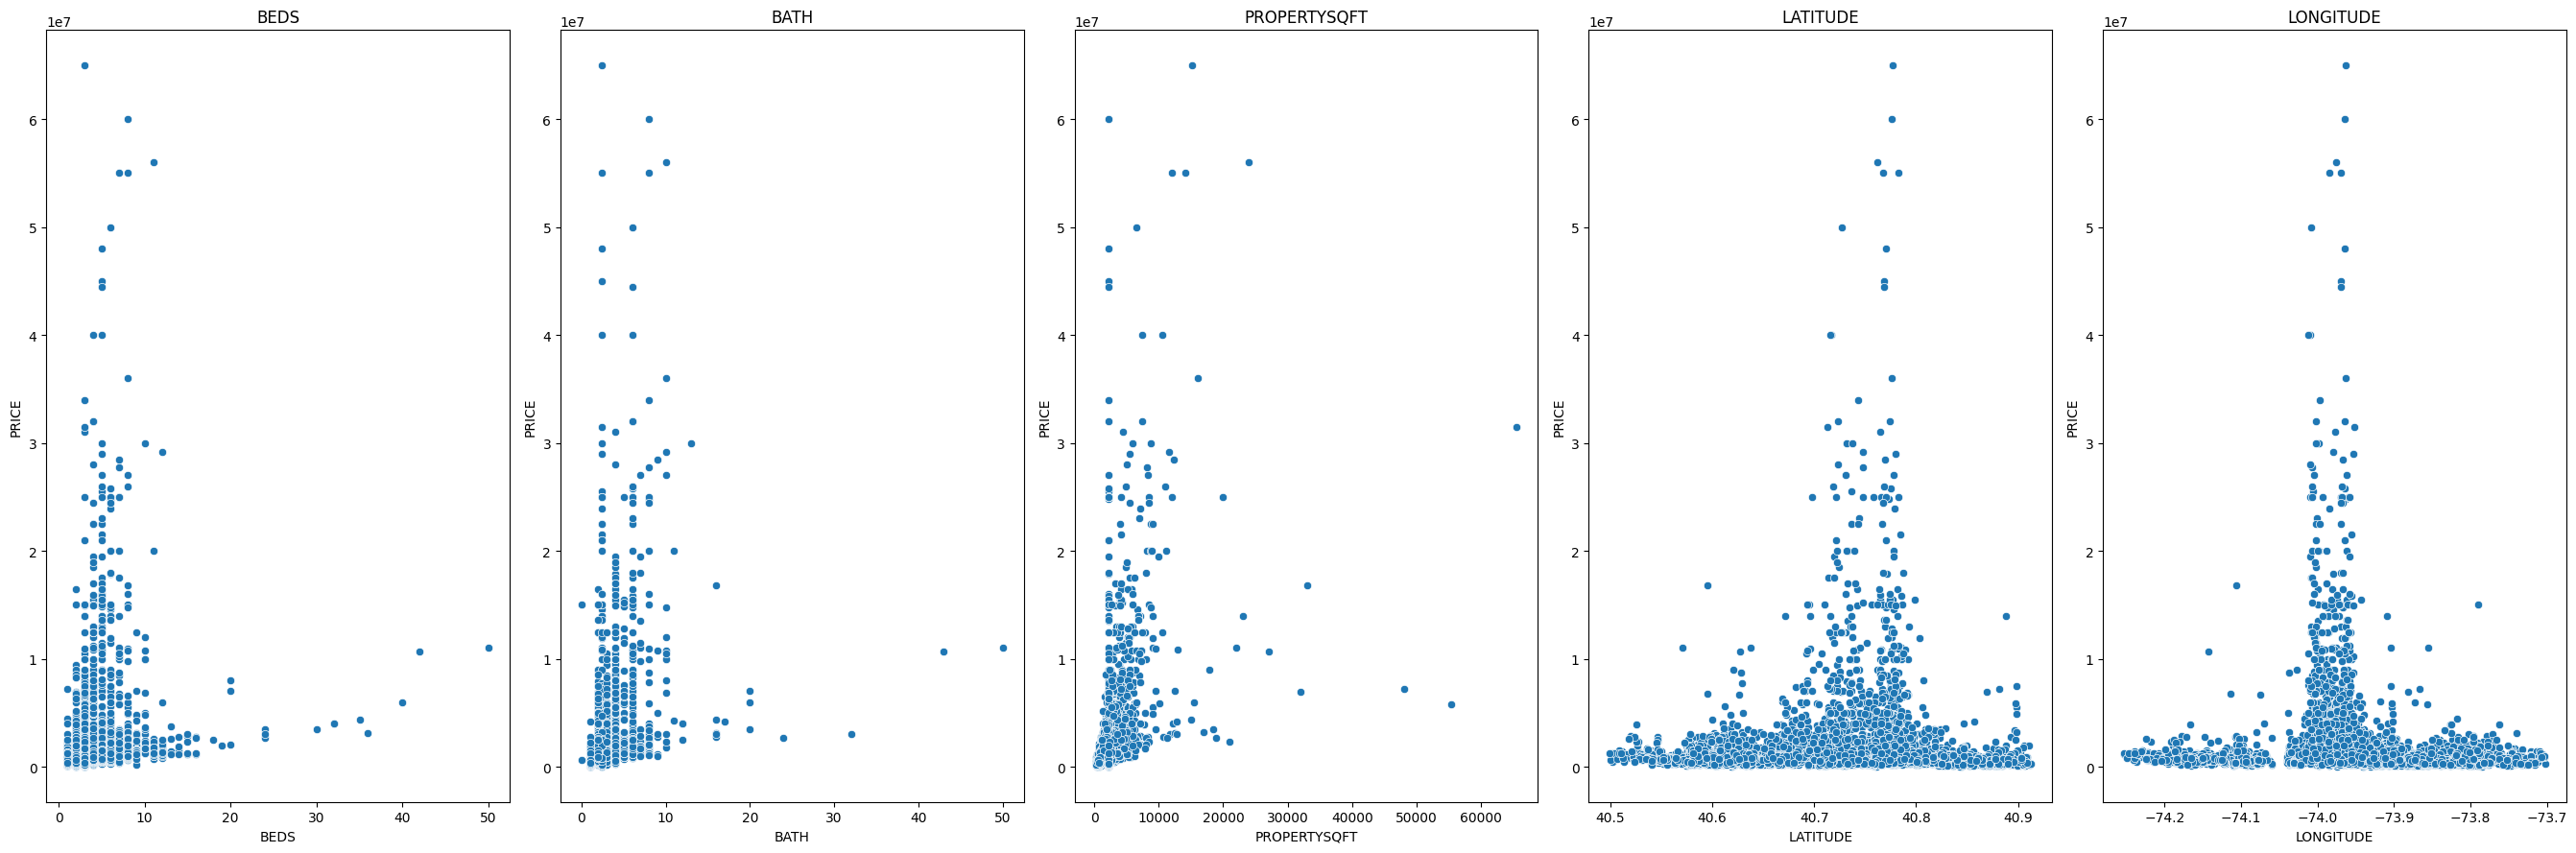

In [451]:
# Average Score vs Features : Scatter plot

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(27, 9))

sns.scatterplot(x='BEDS', y='PRICE', data=df, ax=ax1)
ax1.set_title('BEDS')

sns.scatterplot(x='BATH', y='PRICE', data=df, ax=ax2)
ax2.set_title('BATH')

sns.scatterplot(x='PROPERTYSQFT', y='PRICE', data=df, ax=ax3)
ax3.set_title('PROPERTYSQFT')

# New axes for LATITUDE and LONGITUDE
sns.scatterplot(x='LATITUDE', y='PRICE', data=df, ax=ax4)
ax4.set_title('LATITUDE')

sns.scatterplot(x='LONGITUDE', y='PRICE', data=df, ax=ax5)
ax5.set_title('LONGITUDE')

plt.tight_layout()
plt.show()


C:\Users\zakaria boukeffa\AppData\Local\Temp\ipykernel_25576\258146315.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BEDS', y='PRICE', data=df, palette="Set2", ax=ax1, showfliers=False)
C:\Users\zakaria boukeffa\AppData\Local\Temp\ipykernel_25576\258146315.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BATH', y='PRICE', data=df, palette="Set2", ax=ax2, showfliers=False)


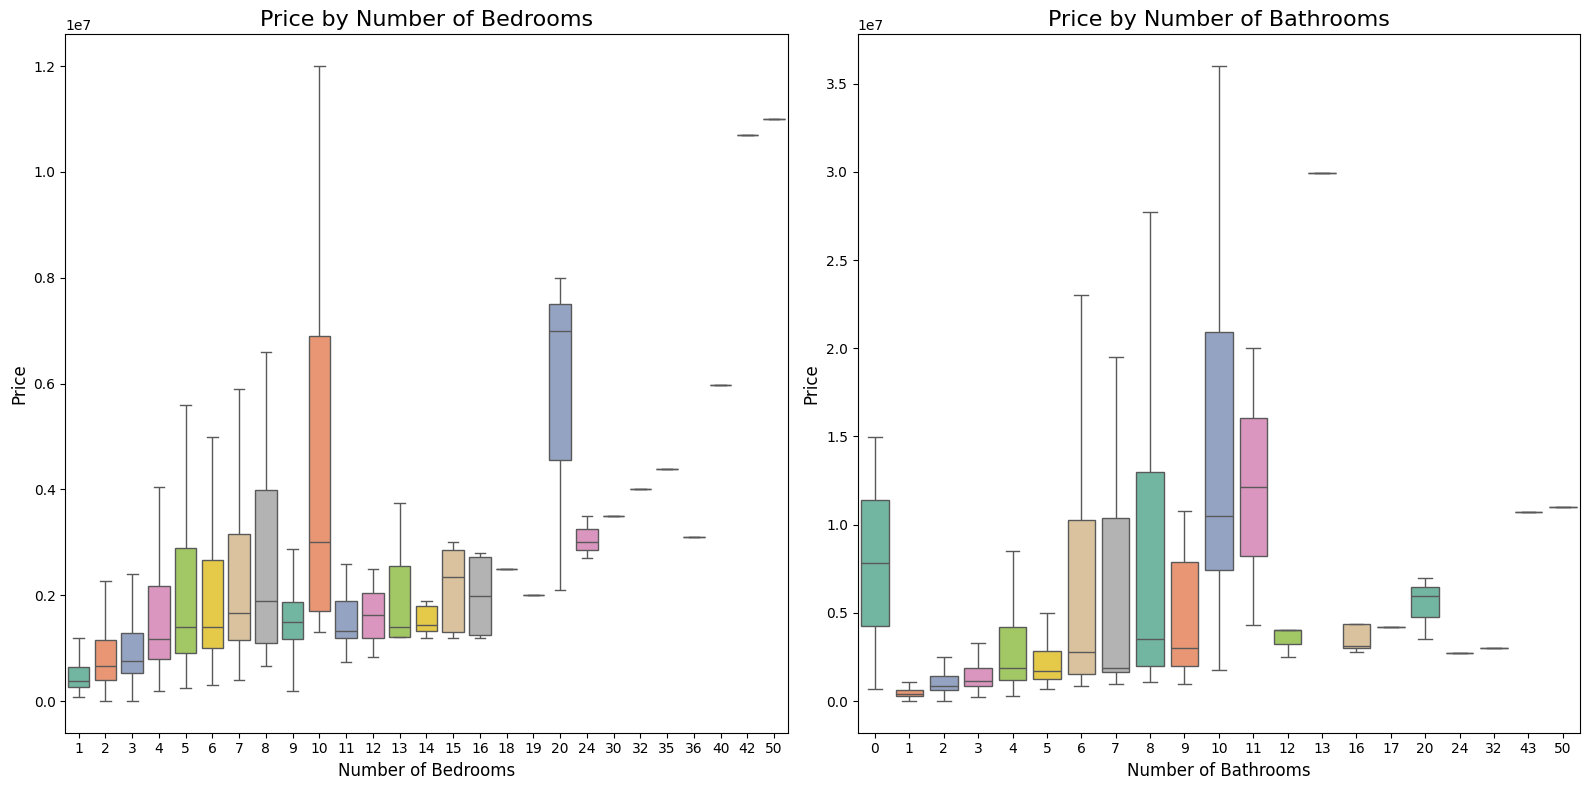

In [452]:
# Average Score vs Features : Box Plot

df['BATH'] = df['BATH'].astype(int)
df['BEDS'] = df['BEDS'].astype(int)

# Création de la figure avec des sous-graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Boxplot pour BEDS (avec gestion des outliers)
sns.boxplot(x='BEDS', y='PRICE', data=df, palette="Set2", ax=ax1, showfliers=False)
ax1.set_title('Price by Number of Bedrooms', fontsize=16)
ax1.set_xlabel('Number of Bedrooms', fontsize=12)
ax1.set_ylabel('Price', fontsize=12)

# Boxplot pour BATH (avec gestion des outliers)
sns.boxplot(x='BATH', y='PRICE', data=df, palette="Set2", ax=ax2, showfliers=False)
ax2.set_title('Price by Number of Bathrooms', fontsize=16)
ax2.set_xlabel('Number of Bathrooms', fontsize=12)
ax2.set_ylabel('Price', fontsize=12)

# Ajustement des espacements pour éviter le chevauchement
plt.tight_layout()
plt.show()


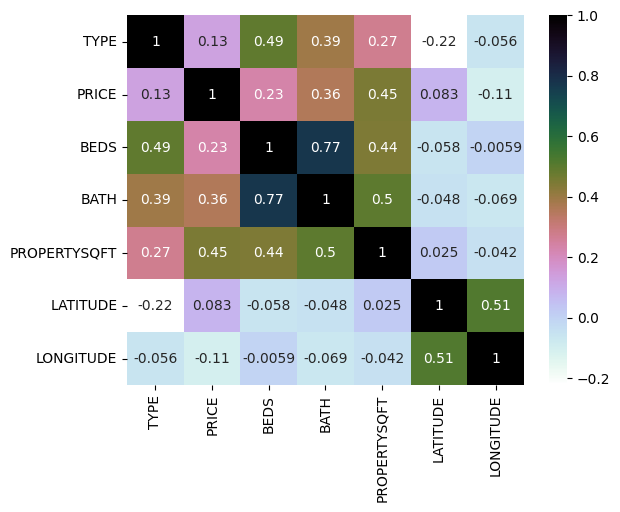

In [453]:
# Heat Map :
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r') 
plt.show()

## 5 - Clustering with K- Means:

- Elbow Method

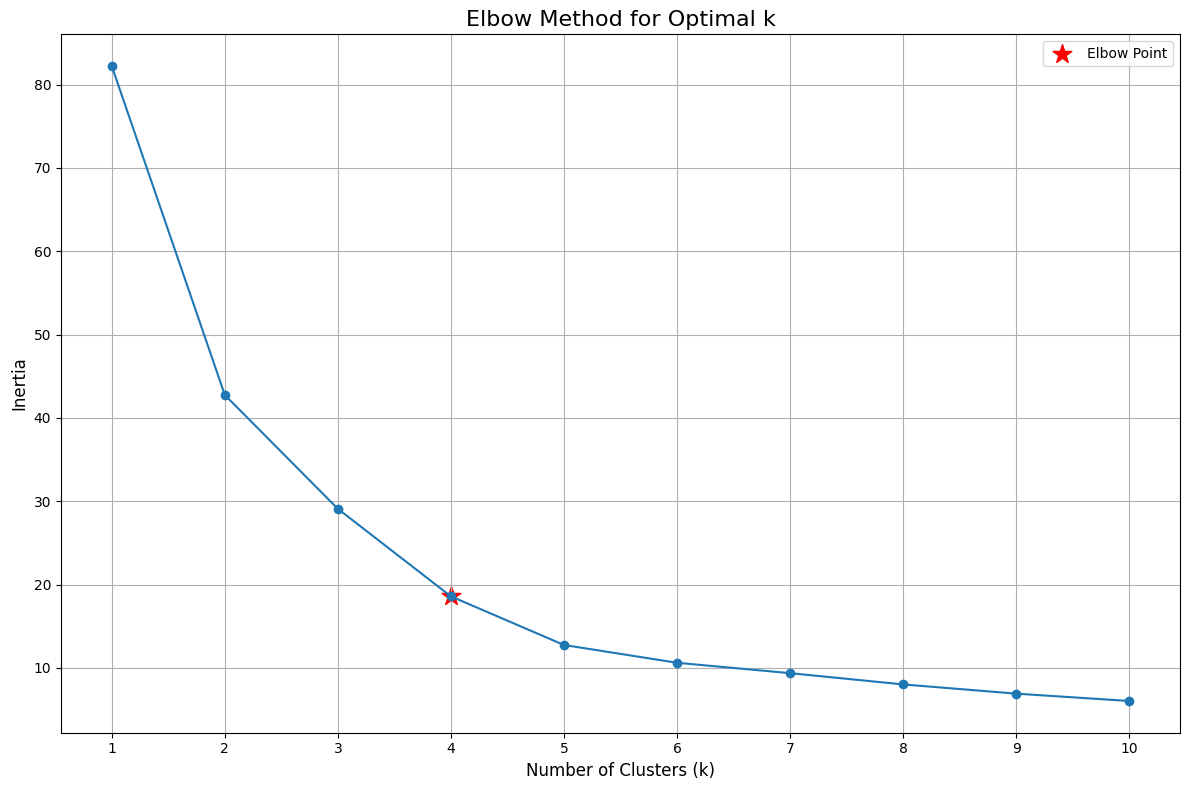

In [454]:
# Select features for clustering
X = df[['LATITUDE', 'LONGITUDE']]

# Elbow Method
clustering_score = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    clustering_score.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), clustering_score, marker='o')
plt.title('Elbow Method for Optimal k', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.xticks(range(1, 11))
plt.grid(True)

# Highlighting the elbow point 
elbow_point = 4  #
plt.scatter(elbow_point, clustering_score[elbow_point-1], s=200, c='red', marker='*', label='Elbow Point')

plt.legend()
plt.tight_layout()
plt.show()



- Simple K means

   TYPE   PRICE  BEDS  BATH  PROPERTYSQFT   LATITUDE  LONGITUDE  Cluster
0     1  315000     2     2        1400.0  40.761255 -73.974483        1
2     6  260000     4     2        2015.0  40.541805 -74.196109        2
3     1   69000     3     1         445.0  40.761398 -73.974613        1


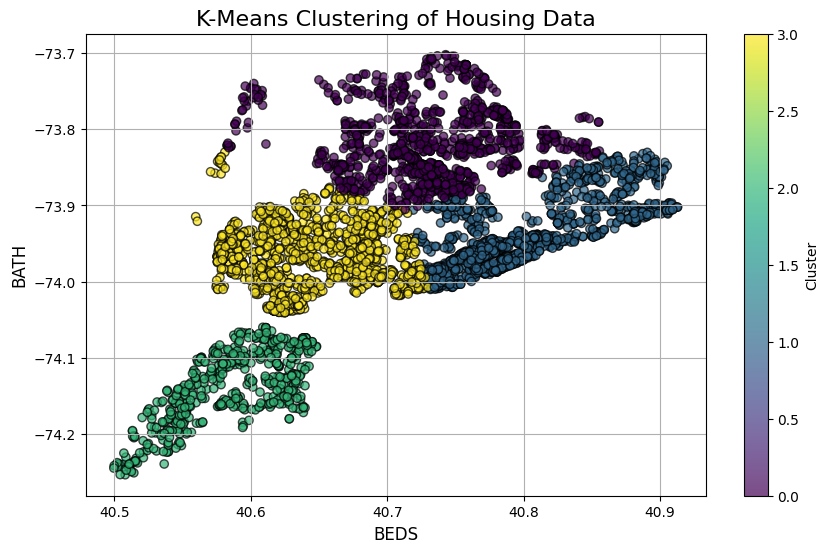

In [455]:
# Select features for clustering
X = df[['LATITUDE', 'LONGITUDE', ]]

# KMeans
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the model
kmeans.fit(X)

# Predict clusters
clusters = kmeans.predict(X)

# Add cluster labels to your DataFrame for analysis
df_with_clusters = df.copy()
df_with_clusters['Cluster'] = clusters

# Print the first few rows with cluster assignments
print(df_with_clusters.head(3))

# Visualize clusters in 2D
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_with_clusters['LATITUDE'], df_with_clusters['LONGITUDE'], 
                      c=clusters, cmap='viridis', marker='o', edgecolor='k', alpha=0.7)

plt.title('K-Means Clustering of Housing Data', fontsize=16)
plt.xlabel('BEDS', fontsize=12)
plt.ylabel('BATH', fontsize=12)
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()



- Applying KMeans to all features

   TYPE   PRICE  BEDS  BATH  PROPERTYSQFT   LATITUDE  LONGITUDE  Cluster
0     1  315000     2     2        1400.0  40.761255 -73.974483        1
2     6  260000     4     2        2015.0  40.541805 -74.196109        0
3     1   69000     3     1         445.0  40.761398 -73.974613        1


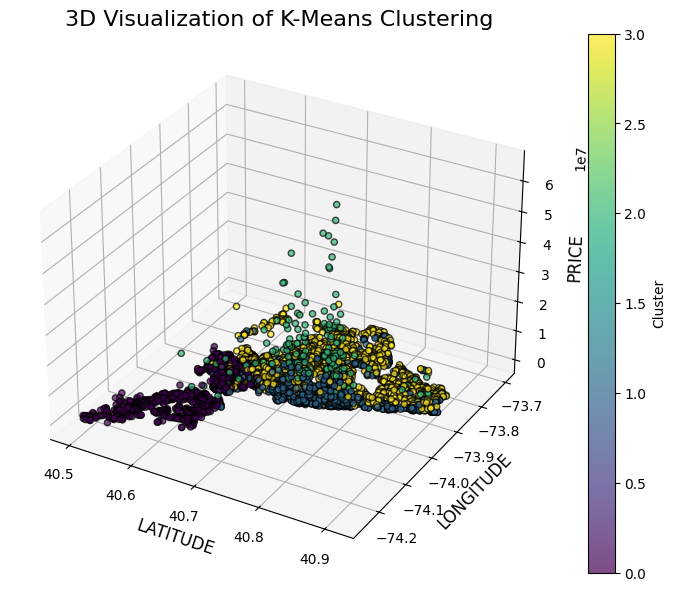

In [456]:
from mpl_toolkits.mplot3d import Axes3D

# Standardize the data (important for KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)  # Scale all features


# KMeans
kmeans = KMeans(n_clusters=4, random_state=42)


# Fit the model
kmeans.fit(X_scaled)


# Predict clusters
clusters = kmeans.predict(X_scaled)


# cluster labels 
df_with_clusters = df.copy()
df_with_clusters['Cluster'] = clusters


# Print the first few rows with cluster assignments
print(df_with_clusters.head(3))


# Visualize clusters in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')


# Choose three features to plot
x_feature = 'LATITUDE'
y_feature = 'LONGITUDE'
z_feature = 'PRICE'  


# Create the scatter plot
scatter = ax.scatter(df_with_clusters[x_feature], df_with_clusters[y_feature], df_with_clusters[z_feature],
                     c=clusters, cmap='viridis', marker='o', edgecolor='k', alpha=0.7)

# Labels and title
ax.set_title('3D Visualization of K-Means Clustering', fontsize=16)
ax.set_xlabel(x_feature, fontsize=12)
ax.set_ylabel(y_feature, fontsize=12)
ax.set_zlabel(z_feature, fontsize=12)

# colorbar
plt.colorbar(scatter, ax=ax, label='Cluster')
plt.show()


## 6 -Machine Learning

### Data Splitting

In [457]:
X = df.drop(columns='PRICE',) 
y = df['PRICE']
X_train, X_test , y_train , y_test = train_test_split(X,y, test_size=0.2)

- Data Verification

In [458]:
X_train.head(3)

,TYPE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
774,1,1,1,782.000000,40.877877,-73.918877
1020,0,2,2,1200.000000,40.883066,-73.920643
2703,6,4,3,2184.207862,40.682563,-73.799077


In [459]:
y_train.head(3)

774     374900
1020    430000
2703    998888
Name: PRICE, dtype: int64

In [460]:
X_test.head(3)

,TYPE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
3863,8,3,2,2070.0,40.897404,-73.842791
769,0,2,2,1200.0,40.616867,-74.038093
3538,1,3,2,1744.0,40.773570,-73.946154


In [461]:
y_test.head(3)

3863     675999
769      675000
3538    2449000
Name: PRICE, dtype: int64

### Linear Regression


In [462]:
# Model Training
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_prediction = lr_model.predict(X_test)

# Displaying Results
results = pd.DataFrame({'Real Value': y_test, 'Prediction': lr_prediction})
print(results.head(4))


      Real Value    Prediction
3863      675999  2.627402e+06
769       675000  9.498926e+05
3538     2449000  1.869015e+06
1427     3900000  7.666330e+06


### Random Forest

In [463]:
# Model Training
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_prediction = rf_model.predict(X_test)

# Displaying Results
results = pd.DataFrame({'Real Value': y_test, 'Prediction': rf_prediction})
print(results.head(4))

      Real Value    Prediction
3863         675999  6.723637e+05
769          675000  7.622900e+05
3538        2449000  1.440750e+06
1427        3900000  3.935800e+06


## 7- Evaluation

In [464]:
# Features Importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
print("\nFeatures Importance:")
print(feature_importance.sort_values('importance', ascending=False))


Importance des features:
        feature  importance
3  PROPERTYSQFT    0.369429
4      LATITUDE    0.182204
5     LONGITUDE    0.159235
0          TYPE    0.116745
2          BATH    0.096382
1          BEDS    0.076006


In [465]:
# Evaluation of Linear Regression Model
lr_mse = metrics.mean_squared_error(y_test, lr_prediction)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = metrics.r2_score(y_test, lr_prediction)

# Evaluation of Random Forest Model
rf_mse = metrics.mean_squared_error(y_test, rf_prediction)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = metrics.r2_score(y_test, rf_prediction)

# Printing the evaluation metrics for both models
print("\nLinear Regression Evaluation:")
print(f"Mean Squared Error: {lr_mse}")
print(f"Root Mean Squared Error: {lr_rmse}")
print(f"R² Score: {lr_r2}")

print("\nRandom Forest Evaluation:")
print(f"Mean Squared Error: {rf_mse}")
print(f"Root Mean Squared Error: {rf_rmse}")
print(f"R² Score: {rf_r2}")


Linear Regression Evaluation:
Mean Squared Error: 9980843742829.639
Root Mean Squared Error: 3159247.338026834
R² Score: 0.09808797870337871

Random Forest Evaluation:
Mean Squared Error: 2965330795927.4243
Root Mean Squared Error: 1722013.5876140536
R² Score: 0.732039939620396


## 8 - Result Communication

For a detailed discussion of the results, insights, and model performance, please refer to the attached report .